# 4.6. EM-алгоритм. Практика

Рассмотрим реализацию алгоритма в библиотеке Sklearn. Наш алгоритм лежит в пакете GaussianMixture. При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.

In [1]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

In [6]:
import numpy as np
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6530/3164042014.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6530/3164042014.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6530/3164042014.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(f'23{i}')
/var/folders/_q/03tkk3nx5xq63qd_bldrts5h0000gn/T/ipykernel_6530/3164042014.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 an

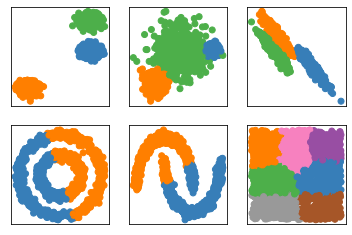

In [11]:
from sklearn import datasets
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 7})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [14]:
def prepare_blobs():
    n_samples = 1500
    dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5), cluster_std=[1.4, 1.7], random_state=42)
    X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
    transformation = [[1.2, -0.8], [-0.4, 1.7]]
    X_2 = np.dot(X_2, transformation)
    X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
    return X, y

In [15]:
X, y = prepare_blobs()

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()
#gm.fit(X)
#y_pred = gm.predict(X)
y_pred = gm.fit_predict(X)
means = gm.means_




## Задание 4.6.1

2.0/2.0 points (graded)
В алгоритме K-means за число кластеров отвечал параметр n_clusters. Какой параметр задаёт число кластеров в EM-алгоритме?

n_components int, default=1
The number of mixture components.

### ответ n_components

## Задание 4.6.2

2.0/2.0 points (graded)
Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [16]:
from sklearn.mixture import GaussianMixture
import numpy as np
gm = GaussianMixture(n_components=3, random_state=42)
#gm.fit(X)
#y_pred = gm.predict(X)
y_pred = gm.fit_predict(X)
means = gm.means_
print(np.round(means).astype(np.int))



[[ 4  2]
 [-2  7]
 [-4 -2]]


## ответ [[4 2] [-2 7] [-4 -2]]

## Задание 4.6.3

2.0/2.0 points (graded)
Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [28]:
import numpy as np

a = y_pred
_, counts = np.unique(a, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

## ответ 744 763 1493